In [ ]:
# pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# X_df = pd.read_csv('/content/df_x.csv')
# Y_df = pd.read_csv('/content/df_y.csv')

X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_x.csv')
Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_y.csv')

# X_df = pd.read_csv('@datasets_reproducibity/Exchange/S/df_x.csv')
# Y_df = pd.read_csv('@datasets_reproducibity/Exchange/S/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,-0.5,-0.333333,-0.500000,-0.500000
1,2002-01-08,-0.5,-0.333333,-0.266667,-0.480822
2,2002-01-15,-0.5,-0.333333,-0.033333,-0.461644
3,2002-01-22,-0.5,-0.333333,0.200000,-0.442466
4,2002-01-29,-0.5,-0.333333,0.433333,-0.423288
...,...,...,...,...,...
961,2020-06-02,-0.5,-0.333333,-0.466667,-0.080822
962,2020-06-09,-0.5,-0.333333,-0.233333,-0.061644
963,2020-06-16,-0.5,-0.333333,0.000000,-0.042466
964,2020-06-23,-0.5,-0.333333,0.233333,-0.023288


In [ ]:
Y_df

,ds,unique_id,y
0,2002-01-01,% WEIGHTED ILI,-0.421499
1,2002-01-01,%UNWEIGHTED ILI,-0.472442
2,2002-01-01,AGE 0-4,-0.981641
3,2002-01-01,AGE 5-24,-0.692621
4,2002-01-01,ILITOTAL,-0.819695
...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263
6758,2020-06-30,AGE 5-24,0.023051
6759,2020-06-30,ILITOTAL,0.651678
6760,2020-06-30,NUM. OF PROVIDERS,3.454565


In [ ]:
a=Y_df['unique_id'].unique()
a.size

7

In [ ]:
import pandas as pd
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,% WEIGHTED ILI,-0.421499,-0.5,-0.333333,-0.500000,-0.50000
1,2002-01-01,%UNWEIGHTED ILI,-0.472442,-0.5,-0.333333,-0.500000,-0.50000
2,2002-01-01,AGE 0-4,-0.981641,-0.5,-0.333333,-0.500000,-0.50000
3,2002-01-01,AGE 5-24,-0.692621,-0.5,-0.333333,-0.500000,-0.50000
4,2002-01-01,ILITOTAL,-0.819695,-0.5,-0.333333,-0.500000,-0.50000
...,...,...,...,...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263,-0.5,-0.333333,0.466667,-0.00411
6758,2020-06-30,AGE 5-24,0.023051,-0.5,-0.333333,0.466667,-0.00411
6759,2020-06-30,ILITOTAL,0.651678,-0.5,-0.333333,0.466667,-0.00411
6760,2020-06-30,NUM. OF PROVIDERS,3.454565,-0.5,-0.333333,0.466667,-0.00411


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.drop("ds",axis=1,inplace=True)
filtered_df['ds'] = range(len(filtered_df))
Y_df=filtered_df
Y_df

<ipython-input-9-ca2bf7442fa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("ds",axis=1,inplace=True)
<ipython-input-9-ca2bf7442fa3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = range(len(filtered_df))


,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


## Horizon 24

In [ ]:
Y_df=filtered_df

In [ ]:
Y_train_df = Y_df.iloc[:942,:]
Y_test_df = Y_df.iloc[942:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,942,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,943,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,944,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,945,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,946,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,947,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,948,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,949,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,950,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,951,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
horizon = 24
model = NHITS(h=horizon, input_size=24,
               max_steps=1000,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.794     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,4.541717
OT,1,4.393240
OT,2,4.232237
OT,3,3.917651
OT,4,3.866955
OT,5,3.595390
OT,6,3.382649
OT,7,3.148551
OT,8,3.238232


<Axes: xlabel='ds'>

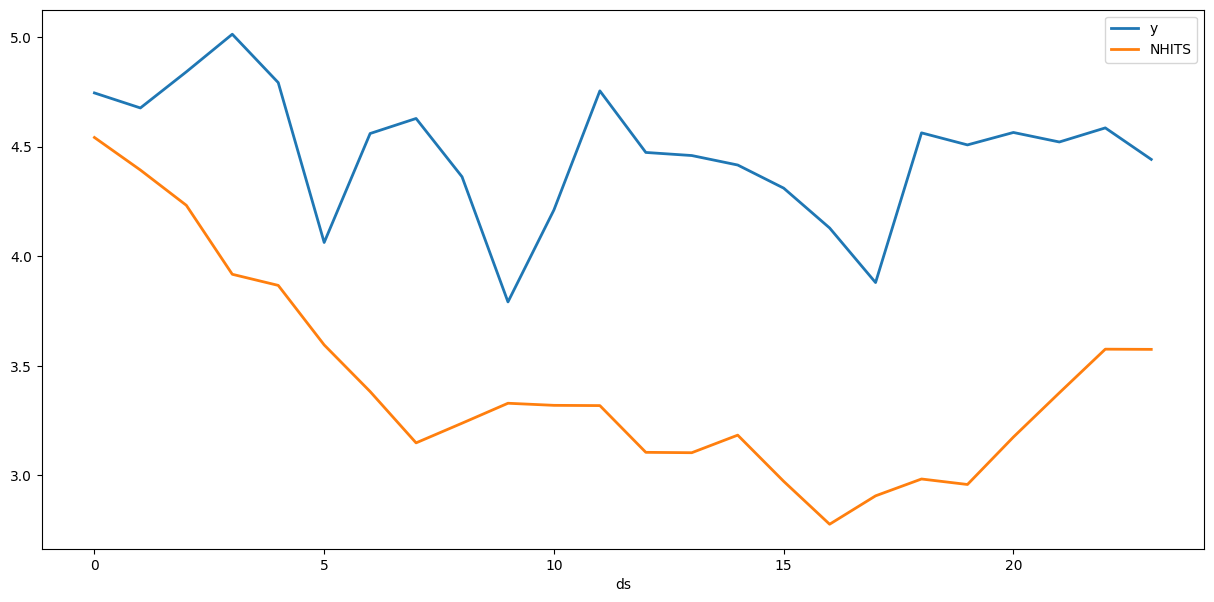

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,4.541717
1,4.393240
2,4.232237
3,3.917651
4,3.866955
5,3.595390
6,3.382649
7,3.148551
8,3.238232


In [ ]:
mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'NHITS MAE: {mae_nhits:.3f}')
print(f'NHITS MSE: {mse_nhits:.3f}')

NHITS MAE: 1.055
NHITS MSE: 1.265


## Horizon 36

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:930,:]
Y_test_df = Y_df.iloc[930:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,930,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,931,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,932,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,933,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,934,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,935,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,936,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,937,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,938,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,939,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
horizon = 36
model = NHITS(h=horizon, input_size=24,
               max_steps=2000,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.5 M 
-----------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
9.837     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=2000` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,3.695756
OT,1,3.869430
OT,2,4.234934
OT,3,4.684544
OT,4,5.154166
OT,5,4.551848
OT,6,4.796812
OT,7,5.231198
OT,8,4.520536


<Axes: xlabel='ds'>

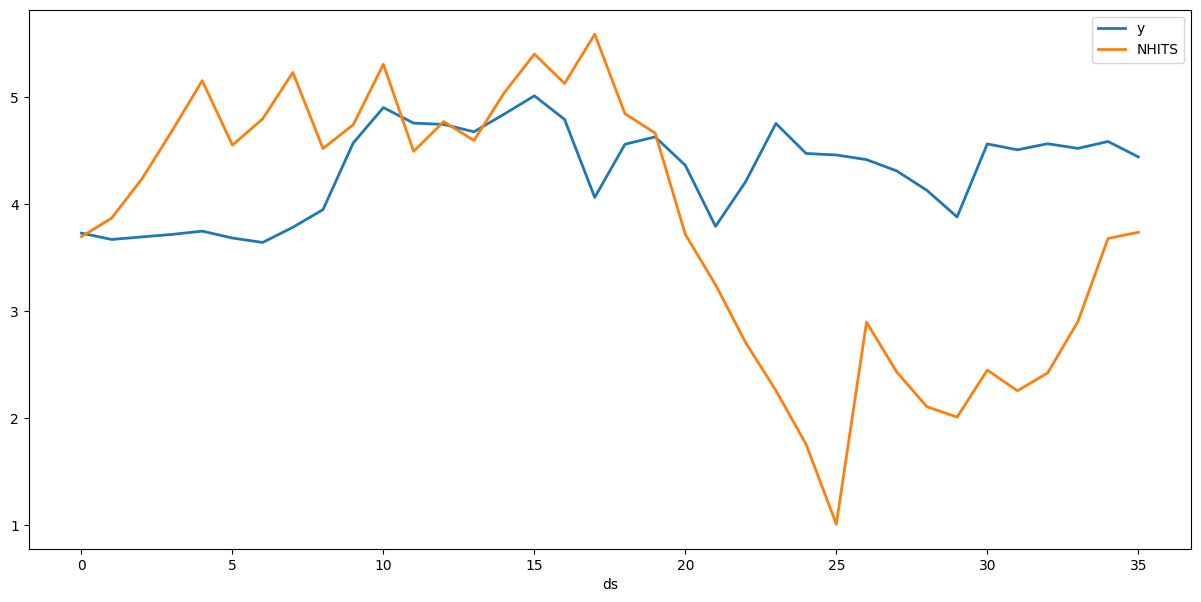

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,3.695756
1,3.869430
2,4.234934
3,4.684544
4,5.154166
5,4.551848
6,4.796812
7,5.231198
8,4.520536


In [ ]:
mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'NHITS MAE: {mae_nhits:.3f}')
print(f'NHITS MSE: {mse_nhits:.3f}')

NHITS MAE: 1.092
NHITS MSE: 1.966


## Horizon 48

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:918,:]
Y_test_df = Y_df.iloc[918:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,918,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,919,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,920,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,921,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,922,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,923,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,924,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,925,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,926,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,927,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
horizon = 48
model = NHITS(h=horizon, input_size=24,
               max_steps=1000,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.5 M 
-----------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
9.880     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,1.423364
OT,1,2.478853
OT,2,2.135976
OT,3,1.680450
OT,4,1.666757
OT,5,1.606341
OT,6,1.237995
OT,7,1.468981
OT,8,1.268824


<Axes: xlabel='ds'>

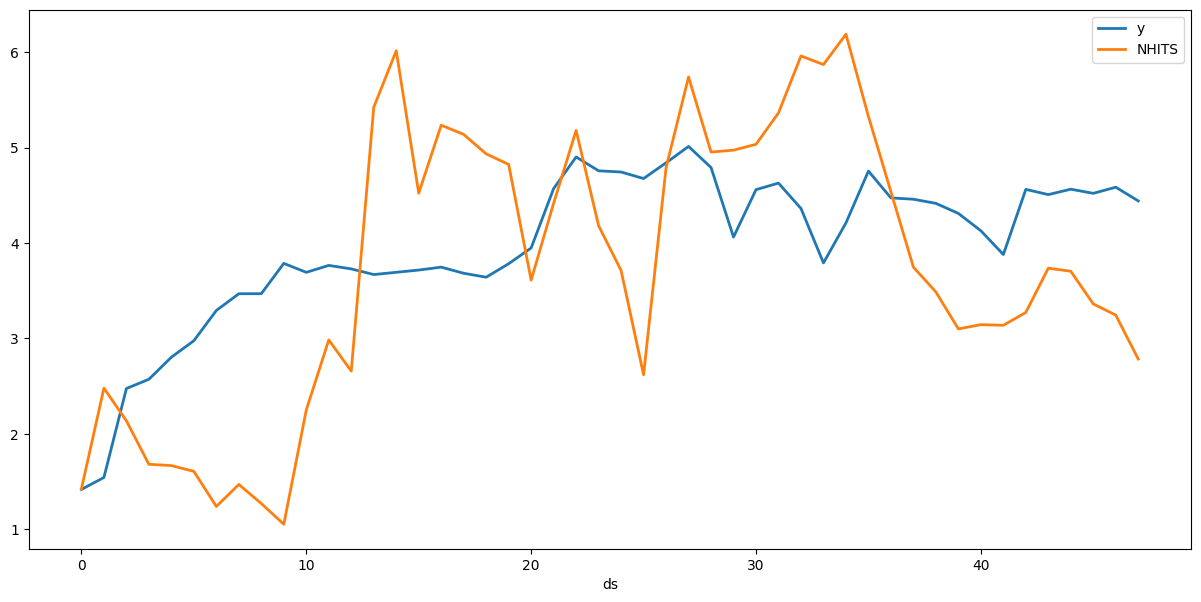

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,1.423364
1,2.478853
2,2.135976
3,1.680450
4,1.666757
5,1.606341
6,1.237995
7,1.468981
8,1.268824


In [ ]:
mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'NHITS MAE: {mae_nhits:.3f}')
print(f'NHITS MSE: {mse_nhits:.3f}')

NHITS MAE: 1.095
NHITS MSE: 1.623


## Horizon 60

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:908,:]
Y_test_df = Y_df.iloc[908:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,908,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,909,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,910,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,911,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,912,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,913,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,914,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,915,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,916,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,917,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
horizon = 60
model = NHITS(h=horizon, input_size=24,
               max_steps=1000,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.5 M 
-----------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
9.923     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,4.229824
OT,1,4.239204
OT,2,4.283423
OT,3,4.131959
OT,4,4.126654
OT,5,4.020865
OT,6,4.022405
OT,7,3.875828
OT,8,3.812850


<Axes: xlabel='ds'>

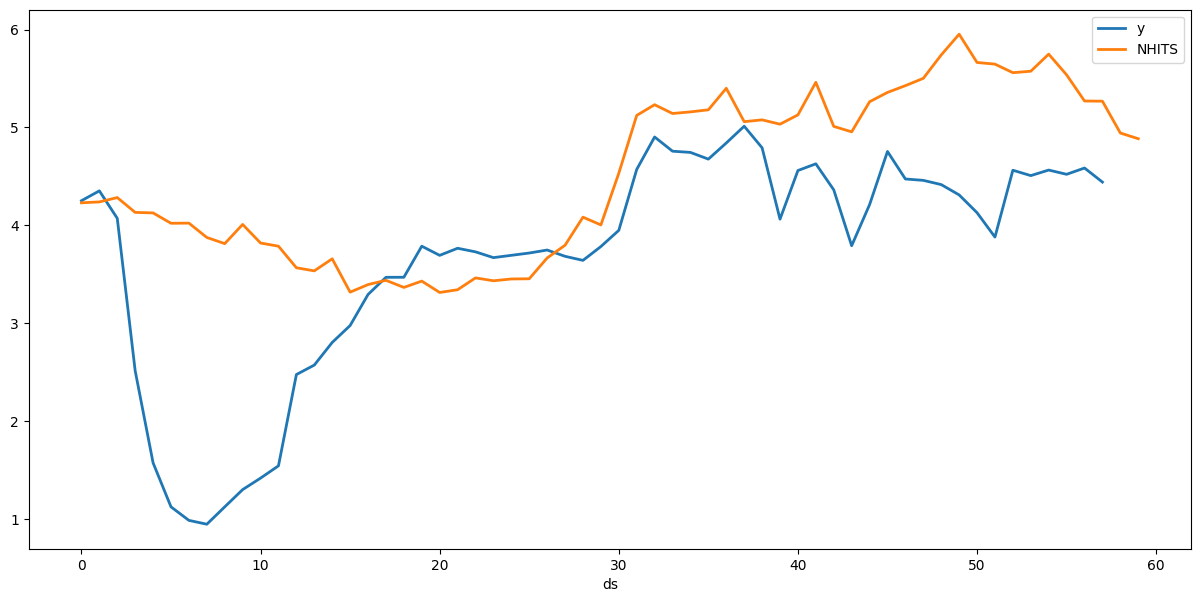

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,4.229824
1,4.239204
2,4.283423
3,4.131959
4,4.126654
5,4.020865
6,4.022405
7,3.875828
8,3.812850


In [ ]:
mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'NHITS MAE: {mae_nhits:.3f}')
print(f'NHITS MSE: {mse_nhits:.3f}')

NHITS MAE: 0.922
NHITS MSE: 1.540
